<a href="https://colab.research.google.com/github/zhangxiaoyuan525/Webacy-program/blob/main/Frequency_and_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Frequency Analysis and Correlation Analysis

**INTRODUCTION**

Smart contracts, self-executing contracts with the terms of the agreement directly written into code, are foundational to decentralized applications on blockchain networks. While they offer significant advantages in terms of automating and enforcing agreements without intermediaries, their immutable and transparent nature also introduces a range of security and operational risks. As these contracts automatically execute predetermined actions based on their code, any flaws or vulnerabilities in the contract's logic or design can lead to irreversible consequences, including financial losses and compromised data integrity.

**The Need for Frequency and Correlation Analysis**

To mitigate these risks and enhance the reliability of smart contracts, it is essential to conduct thorough risk assessments, including frequency and correlation analyses. Here’s why these analyses are crucial:



1.   **Frequency Analysis:**

*   ***Identify Common Risks:*** By determining how frequently certain risks occur across a range of smart contracts, developers and auditors can identify the most common vulnerabilities that need attention. This helps in prioritizing which types of risks require more stringent controls and testing procedures.

*   ***Resource Allocation:*** Understanding the frequency of specific risks enables better allocation of resources towards developing solutions and preventive measures for the most prevalent issues, ensuring efficient use of time and effort in safeguarding contracts.


2.   **Correlation Analysis:**


*   ***Understanding Risk Relationships:*** Correlation analysis helps in understanding the relationships between different types of risks. Knowing whether certain risks tend to occur together can provide insights into underlying causes or conditions that may not be apparent from looking at isolated risks.
*   ***Strategic Mitigation Approaches:*** By identifying correlations between risks, developers can devise more effective mitigation strategies that address multiple vulnerabilities simultaneously. For example, if two highly correlated risks stem from a common flaw in contract design, a single corrective action could mitigate both.
*   ***Enhanced Predictive Capabilities:*** Analyzing the correlations between risks enhances the ability to predict potential vulnerabilities in new or existing smart contracts based on observed patterns. This proactive approach helps in preventing exploits before they occur.

In summary, frequency and correlation analyses are indispensable tools in the arsenal of blockchain developers and security experts, allowing them to build safer and more robust smart contracts. By systematically assessing the risks and understanding their interrelationships, the blockchain community can better safeguard against both known and emerging threats, ultimately fostering trust and adoption of this transformative technology. Now let's do it!






#  Frequency Analysis of Smart Contract Risks

In [ ]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import scipy.stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Display plot inline

%matplotlib inline

In [ ]:
print("Setup complete. Successfully import pandas, seaborn and matplotlib.")

Setup complete. Successfully import pandas, seaborn and matplotlib.


In [ ]:
# Loading the dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTKEMHMAzQdcP_vAhfBQprgVzDxlaT4Xc_4R6dOHNQC38Isc4EjXwaUHyD88tPMNA/pub?output=csv'
df = pd.read_csv(url)

#Display the first five rows of the dataframe
df.head()


,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
#Check the data types and null value
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                967 non-null    object
 1   Smart contract address                      967 non-null    object
 2   Blog post link                              967 non-null    object
 3   Audit website                               967 non-null    object
 4   Chain                                       967 non-null    object
 5   Is_closed_source                            967 non-null    bool  
 6   hidden_owner                                967 non-null    bool  
 7   anti_whale_modifiable                       967 non-null    bool  
 8   Is_anti_whale                               967 non-null    bool  
 9   Is_honeypot                                 967 non-null    bool  
 10  buy_tax                   

In [ ]:
#Define all columns in the dataset we have
risk_columns = ['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax', 'slippage_modifiable',
                'Is_blacklisted', 'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
                'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation', 'bad_contract', 'reusing_state_variable',
                'encode_packed_collision', 'encode_packed_parameters', 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low',
                'event_setter', 'external_dependencies', 'immutable_states', 'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
                'shadowing_local', 'events_maths']

Now we have selected all risk columns and let's do a full frequency analysis on these columns.

In [ ]:
#Calculate the frequency of 'True' in each risk tag column
frequencies = df[risk_columns].apply(lambda x: x.value_counts()).loc[True]
frequencies = frequencies.fillna(0) #Replace null value with 0 for any column that may not have True values
frequencies

,True
Is_closed_source,146
hidden_owner,150
anti_whale_modifiable,112
Is_anti_whale,138
Is_honeypot,89
buy_tax,117
sell_tax,119
slippage_modifiable,139
Is_blacklisted,76
can_take_back_ownership,181


Now we have the frequencies and it's time to visualize them using a barchart.

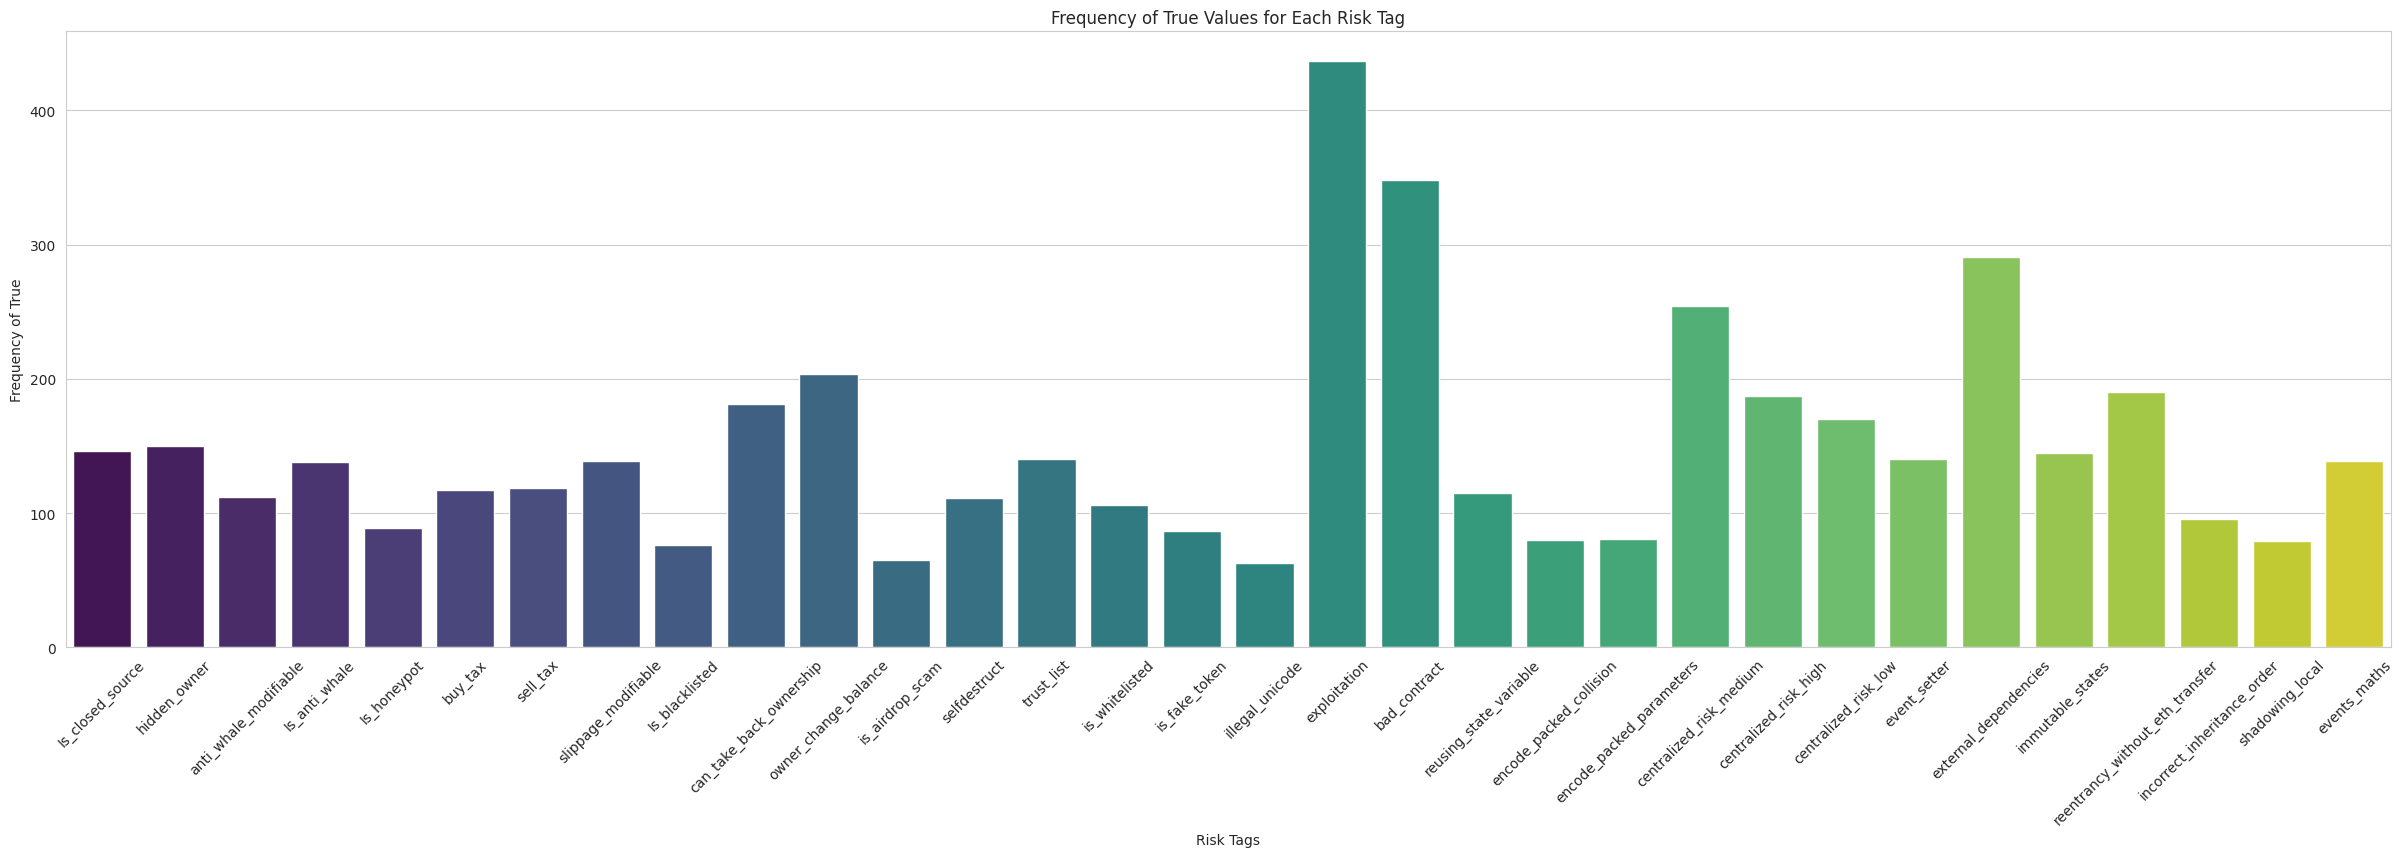

In [ ]:
# Visualization of the frequencies by a bar chart
sns.set_style("whitegrid")
plt.figure(figsize=(30,8))
sns.barplot(x = frequencies.index, y = frequencies.values, palette = 'viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation = 45)
plt.show()

# OUTCOMES AND SIGNIFICANCE

From the barchart above, it's straightforward for us to observe that "Exploitation" and "Bad Contract" occur most frequently, while "Deceptive Token" and "Airdrop Scam" occur least frequently in this frequency analysis of risk tags for smart contract. Such phenomenon can be analyzed from the following perspectives:

# **The High frequency of Exploitation and Bad Contracts**


1.   **Prevalence and Severity**


  *   ***Bad Contract***: Programming errors, design flaws or security vulnerabilities that often exist in smart contract development lead to the high frequency of bad contract discoveries. These contract can be problematic due to a lack of rigorous code review, logical confusion, rapid market advancement, or high technical complexity.
  *   ***Exploitation***: Smart contract platforms are very attractive to malicious attackers due to their financial attributes and automated execution. Exploitation are usually carries out against known security vulnerabilities such as re-entry attacks, time-dependent errors, etc., which are frequently found in flawed contracts.


2.   **Technical Challenges and Motivations**


*   Technical challenges and high potential gains drives attackers to frequently exploit these security vulnerabilities. At the same time, the immutability of smart contracts means that once such risk factors deployed, flaws are difficult and hard to fix, making the exposure to bad contracts that can be exploited for long lasting.

  

# **The Low Frequency "Deceptive Token" and "Airdrop Scam"**


1.   **Specificity and Difficulty of Discovery:**


*   ***Deceptive Token:*** Such risk involves the use of visually similar but differently encoded characters in contracts to mislead users, such as fraudulent use of special characters instead of standard ones. This technique is relatively more complex and harder to detect by automated tools.
*   ***Airdrop Scam:*** Airdrop Scam typically involves inducing user interactions through fake airdrop campaigns, which, while common, may be less frequent as a risk to the contract itself due to the actual small number of contracts involved. Airdrop scams may be more related to marketing or social engineering tactics than technical issues with the contracts themselves.


2.  **Dependence on External Factors:** The low frequency of these risks may reflect their greater reliance on external social engineering or specific attack scenarios. They are less directly linked to fundamental functional or structural flaws in the contract than more technical bad contracts or exploitation.


# **Conclusion**

The high frequency of “Exploitation” and “Bad Contract” reflects the prevalence of security challenges in smart contract development and the high motivation of attackers. The low frequency of “Deceptive Token” and “Airdrop Scam” may point to the fact that these risks, while potentially harmful, are not as prevalent or easy to detect in actual contracts. These insights are critical to the development of security audits and risk management strategies for smart contracts, which need to be tailored to the different types of risks.








# Correlation Analysis of Smart Contract Risk Tags

As we have loaded necessary libraries, now we could calulate correlation straight forward.

In [ ]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    # Calculate the phi coefficient from the contingency table
    chi2 = scipy.stats.chi2_contingency(contingency_table, correction = False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

# Example calculation between two risk tags
phi = phi_coefficient(df['bad_contract'], df['external_dependencies'])
print(f"Phi Coefficient between 'bad_contract' and 'external_dependencies': {phi}")

Phi Coefficient between 'bad_contract' and 'external_dependencies': 0.21418991504798196


After setting the function as above, now we are going to use it to do correlation analysis to all risk tags.

In [ ]:
risk_df = df[risk_columns]

# Create a DataFrame to store Phi coefficients
phi_matrix = pd.DataFrame(index = risk_df.columns, columns = risk_df.columns)

#Calculate Phi coefficient for each pair of binary variables
for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1,var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

Phi coefficients calculated for all pairs of variables:


,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


Now we have the full correlation matrix in front of us and we shall illustrate the results we have in a heatmap to better visualize it.

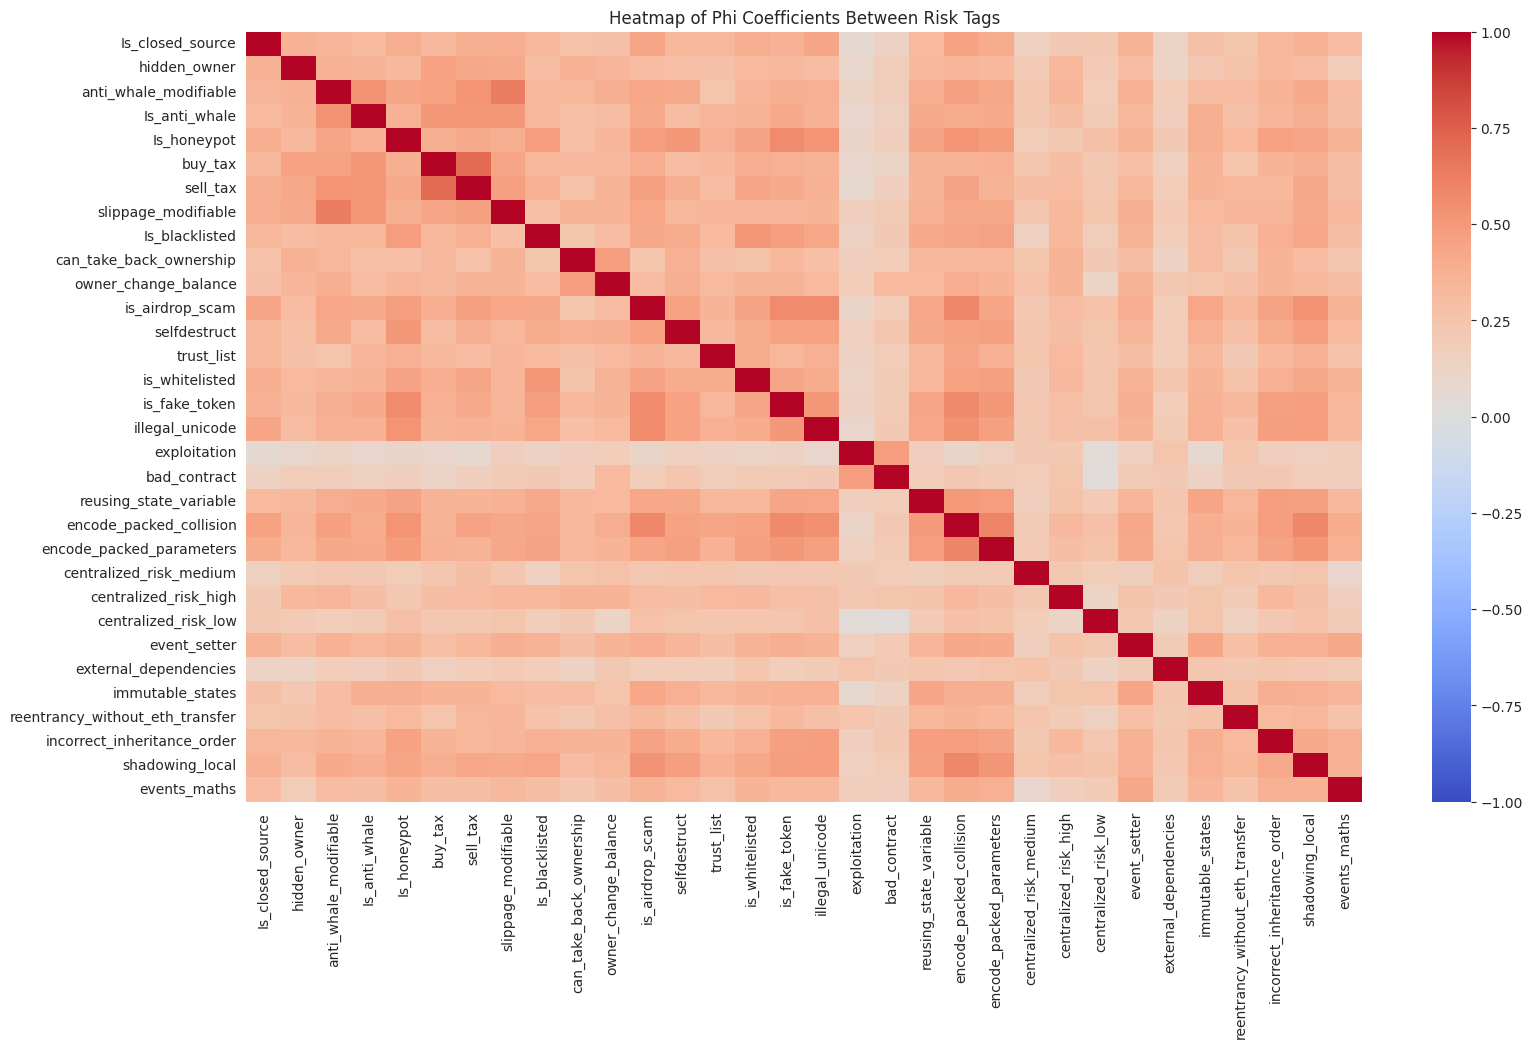

In [ ]:
# Setting the size of the plot
plt.figure(figsize = (18,10))

#Create a heatmap
sns.heatmap(phi_matrix.astype(float), annot=False, fmt = ".2f", cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()

To better see the important values of phi which indicates strong or no correlation, we shall number those squares to make it more straightforward.



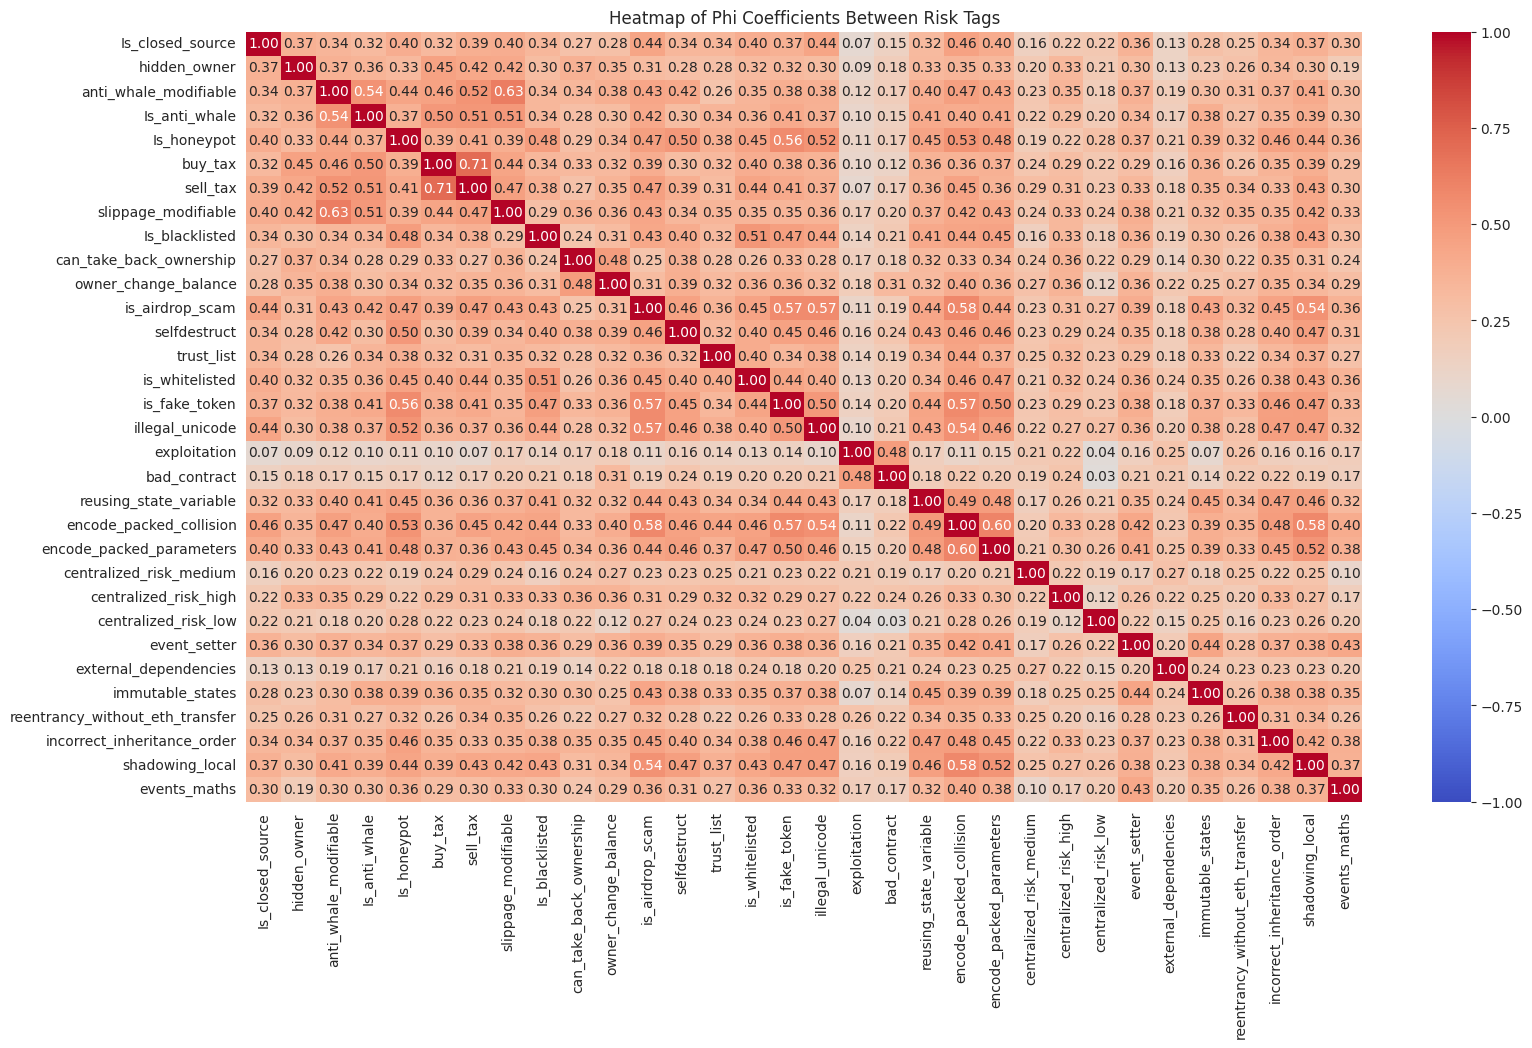

In [ ]:
# Setting the size of the plot
plt.figure(figsize = (18,10))

#Create a heatmap
sns.heatmap(phi_matrix.astype(float), annot=True, fmt = ".2f", cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Heatmap of Phi Coefficients Between Risk Tags')
plt.show()

# OUTCOMES AND SIGNIFICANCE



The results of this analysis reveal five clear insights: there is no negative correlation observed between any of the contract risks, the strongest positive correlation is displayed between "Buy Tax" and "Sell Tax", "Encode packed collision" shows the most correlationships with other risks, "Centralized Risk Low" and "Bad Contract" have the least correlation  and while "Bad Contract" and "Exploitation" show no correlation with other contract risks, they significantly exhibit a weak positive correlation with each other.

# **Non-negative Correlation**


1.   **Possible reasons for not showing negative correlation are analyzed:**


*   ***Risk Cumulativity:*** In smart contracts, different risks tend to be cumulative rather than mutually exclusive. For example, a contract may have multiple risks such as “bad contract” and “external dependency”, and the coexistence of these risks does not cancel each other out, but may exacerbate each other.

*   ***Common sources of risk:*** Many risks can stem from the same root cause, such as poor design, lack of transparency or coding errors. This means that different risk labels may be different manifestations of the same problem, so they do not show a negative correlation with each other.

*   ***Contract design and functional complexity:*** The design of smart contracts often involves complex logic and diverse functional implementations, making it possible for the presence of one risk to signal the presence of other risks rather than their absence. For example, a contract with a high degree of complexity may simultaneously introduce re-entry risks, incorrect inheritance ordering, and variable state issues.

* ***Risk detection and assessment methods:*** Risk detection is usually performed based on techniques such as static analysis, dynamic testing and formal verification. These methods tend to reveal all possible risks rather than identifying exclusions or interactions between risks, and therefore negative correlations may not be easily observed.



2.   **Countermeasures and Risk Management Recommendations:**



*   ***Comprehensive Risk Assessment:*** A comprehensive risk assessment of smart contracts should be performed, considering all potential risk factors rather than expecting that the absence of some risks may indicate the absence of others.

*   ***Meticulous Contract Auditing:*** Identify and minimize flaws in design and coding through meticulous code auditing and review mechanisms. The use of multiple tools and methodologies can help reveal a wider range of potential issues.

* ***Enhanced security measures and governance:***
Enhanced security measures for contracts, including the use of tighter privilege controls, the introduction of multiple validation processes, and improved governance mechanisms, prevent the accumulation of risk and potential risk interactions.









# High Positive Correlation Between "Buy Tax" and "Sell Tax"



*   **Reason:** In the design and implementation of smart contracts, buy and sell taxes are usually controlled by the same set of code logic which makes it easy to set hidden buy tax while setting a hidden sell tax.



# "Encode packed collision" shows a high correlation with a variety of other risks

It could be driven by several factors listed below:




1.   **Technical characteristics of encode_packed_collision:**


*   ***Definition and Impact:*** An encode_packed_collision is a situation where different inputs to a smart contract are tightly packed in the same way, resulting in the hash function outputting the same result. This typically occurs when a fixed-length input is encoded using a hash function such as keccak256. Such collisions can be exploited maliciously for forging or tampering with key parameters in a contract.
*   ***Wide range of risk associations:*** Since the potential consequences of an encoding packing collision involve data integrity and validation, it may be associated with various types of contract security issues including, but not limited to, privilege bypass, data tampering, and logic errors.



2.    **Correlation with multiple risk types**

*   ***Data Security and Integrity Risks:*** Since coding and packaging collisions directly affect the reliability of data, it may be associated with any risk that may be triggered by data integrity issues. For example, issues such as data tampering or unauthorized access may have a high correlation with code packing collisions.
*   ***Smart Contract Logic and Design Issues:*** Packaging collisions may exacerbate design flaws that already exist in smart contracts, making it easier for other potential risks such as "bad_contracts," "reentrancy_without_eth_transfer", or other vulnerabilities to be triggered.

3.  **Common Problems in Smart Contract Development**


*   ***Complexity and Error Frequency:*** Smart contract development often involves complex business logic and technical implementations, and developers may not fully understand all security practices, especially when dealing with coding and data handling. This complexity itself can lead to high risk correlation as one small mistake can trigger a chain reaction.
*   ***Neglect of security practices:*** Failure to properly handle technical details such as coding packaging in contract development can lead to multiple security vulnerabilities. Developers may use these techniques without fully understanding their potential risks, thus increasing the chances of multiple risks.

4. **Testing and auditing challenges**


*   ***Difficulty in risk detection:*** Detection of coding packing collisions may not be as obvious as other more intuitive security issues, requiring specialized tools and techniques to identify and mitigate them. This difficulty in detection can mean that when a relevant issue is found, multiple other issues are usually found.


# **Conclusion**

Coded packing collisions show high correlation with multiple risks in smart contracts, reflecting its central role in contract security. This phenomenon emphasizes the need to pay special attention to the security of data handling and coding strategies when designing and auditing smart contracts. Understanding and addressing such risks is key to improving smart contract security, preventing malicious attacks and ensuring stable platform operation.









# "Centralized Risk Low" and "Bad Contract" Has the Weakest Correlation



1.   **Possible Reason:**  

  1.   **Nature of the risk:**

      *   ***Centrality vs. technical quality:*** centrality risk focuses on governance and control allocation, while bad contracts relate to technical and structural integrity. These two areas may not directly interact with each other; a contract can be decentralized (low centrality risk) but still be improperly written or poorly designed (bad contract).
  2.  **Independence risk factors:**

      *   ***Governance independence:*** the degree of centralization primarily affects decision-making and control mechanisms, somewhat independently of the technical quality and robustness of the contract. A decentralized system may have bad contracts even when developers independently introduce flaws.
   
      * ***Decentralization and regulation:*** in some cases, less centralized systems may lack the rigorous oversight that more centralized systems may enforce, potentially allowing more bad contracts to exist undetected or uncorrected.
  3. **Implications:**
      * ***RISK MANAGEMENT:*** This low correlation suggests that risk management strategies should not assume a relationship between the governance model (centrality) and the technical quality of the contracts. These two aspects require independent assessment and mitigation strategies.

      * ***SECURITY AND QUALITY ASSURANCE:*** Ensuring high-quality contract development requires specific practices, such as code reviews, security audits, and design assessments, which are necessary regardless of the contract's governance structure.

   



2.   **Conclusion:** The very low correlation between “low risk of centralization” and “bad contracts” underscores an important aspect of smart contract risk management: governance structure and technical contract integrity are largely independent risk areas. This finding underscores the need for a multifaceted approach to blockchain security that addresses both decentralized governance and the intrinsic quality and security of the contracts themselves. By identifying and addressing these different aspects separately, developers and administrators can better guard against a wide range of risks in blockchain implementations.



# "Bad Contract" and "Exploitation"

The relatively high positive correlation between “bad_contract” and “exploitation” and their low correlation with other risk tags can be analyzed in the following ways. Several aspects can be analyzed:



1.   **the intrinsic link between bad contracts and exploitation**


*   ***Direct correlation:*** bad contracts usually contain programming errors, design flaws, or logic holes that provide exploitable opportunities for malicious actors. As a result, defective contracts naturally become prime targets for exploitative behaviors. Exploitative behaviors (e.g., re-entry attacks, time-dependent errors, etc.) often directly exploit these contract flaws to steal funds or disrupt the normal functioning of the contract.
*   ***Technical level susceptibility:*** the presence of bad contracts increases the vulnerability of the system, making it an easy target for external attacks. Attackers often search for specific weaknesses in such contracts in order to commit exploitation.





2.   **Reasons for low correlation with other risk labels**


*   ***Differences in risk characteristics:*** Other risk labels such as “hidden_owner”, “external_dependencies”, etc., although they may also increase the overall risk of the system, are not related to the technical quality of the contract itself. However, their direct link to the technical quality and exploitative behavior of the contract itself is not as obvious as that of a “bad contract”. These risks may be related to governance, controls or dependencies rather than directly triggering exploitation.
*   ***The causal paths are different:*** for example, hidden owners may lead to governance problems or a lack of trust, but this does not necessarily lead directly to technical exploitation of the contract. Similarly, external dependencies increase a contract's dependence on external services, but the problems caused by such dependencies are usually service failures or tampering, and are less relevant to the direct technical exploitation of the contract.


3. **Consistency between theory and practice**



*   ***Theoretical expectations versus practical observations:*** Theoretically, technical flaws directly increase the likelihood of exploitation, which is consistent with the high correlation between “bad contracts” and “exploitation” observed in the data analysis. This consistency emphasizes the need to pay particular attention to the technical quality and security of contracts when designing and auditing smart contracts to reduce the risk of potential exploitation.

4. **Conclusion:** The high correlation between “bad contracts” and “exploitation” reveals a core issue in smart contract security: technical flaws directly affect the security and reliability of contracts. This finding emphasizes the importance of conducting in-depth code audits, design reviews, and security tests to ensure that contracts meet high security standards before deployment, thereby reducing the risk of malicious exploitation. At the same time, understanding this correlation can also help in taking more targeted measures to prevent and mitigate these risks during risk assessment and management strategy development.








# Insights and Predictions



1.   **High Risk Frequency and Correlation:**


*   The high frequency of “exploitation” (exploit) and “bad_contract” (bad_contract) indicates the prevalence of programming errors and design flaws in smart contracts. The prevalence of these problems signals the need to strengthen security considerations in the development and deployment of smart contracts in the future.
* The high correlation of “encode_packed_collision” (encode_packed_collision) with a wide range of risks reveals pervasive problems with data processing and validation, which can lead to security issues with data integrity and contract execution.

   


2.   **Technical and governance issues:** The presence of certain risks such as “hidden_owner” and “external_dependencies”, although not the most frequent, points to potential weaknesses in the governance and external interfaces of smart contracts. interfaces.



# Recommendations



1.   **Enhance code auditing and testing:**

*   Implement a thorough code audit of all smart contracts, including static analysis and dynamic testing, to identify and fix potential security vulnerabilities.
*   Utilize automated testing tools and third-party auditing services to ensure code quality and security.


2.   **Improve data processing security:**

*   For contracts that involve sensitive data processing, such as those that use hash functions and coding mechanisms, special attention needs to be paid to preventing coding collisions and other related risks.
*   Implement stricter data validation and checking mechanisms to ensure data accuracy and integrity.

3. **Strengthen governance and transparency:**


*   For contracts with governance-related risks, such as “hidden owners,” it is recommended that contract transparency and account traceability be increased, and that trust be enhanced by open-sourcing smart contracts or publicizing relevant information on the blockchain.
*   Mitigating these external risks through contract design by reducing external dependencies or ensuring that the external services relied upon are highly reliable and secure.

4. **Education and training:**

*   Conduct regular smart contract security training for the development team, including the latest security practices and case studies of known risks.
*   Encourage developers to stay on top of new technologies, tools, and best practices in smart contract security.




By implementing the above recommendations, the robustness of smart contracts can be significantly improved and potential security risks can be reduced, thus providing a safer and more reliable blockchain environment for users and investors.







